In [18]:
pip install keras --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


In [1]:
pip install transformers

In [1]:
import pandas as pd
import numpy as np
import re, string
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/ravsssh/Amazon-Sentiment-Analysis/refs/heads/main/tweet.csv'

df = pd.read_csv(url, sep=",")

In [2]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [3]:
# First, check the original distribution of sentiment values
print("Original sentiment distribution:")
print(df['sentiment'].value_counts())

# Calculate the fraction needed to get approximately 5000 samples
sample_size = 5000
sample_fraction = sample_size / len(df)

# Perform stratified sampling
df_sample, _ = train_test_split(
    df,
    train_size=sample_fraction,
    stratify=df['sentiment'],
    random_state=42  # For reproducibility
)

# Make adjustments to get exactly 5000 rows if needed
if len(df_sample) != 5000:
    if len(df_sample) > 5000:
        # Remove excess rows
        df_sample = df_sample.sample(5000, random_state=42)
    else:
        # Add remaining rows
        remaining = df.drop(df_sample.index).sample(5000 - len(df_sample), random_state=42)
        df_sample = pd.concat([df_sample, remaining])

# Verify the sample size and distribution
print(f"\nSample size: {len(df_sample)}")
print("\nSampled sentiment distribution:")
print(df_sample['sentiment'].value_counts())

# Reset index
df_sample = df_sample.reset_index(drop=True)

# Display the first few rows
df_sample.head()

Original sentiment distribution:
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64

Sample size: 5000

Sampled sentiment distribution:
sentiment
neutral     2023
positive    1561
negative    1416
Name: count, dtype: int64


,textID,text,selected_text,sentiment
0,85537b6837,i was right about the wave off,i was right about the wave off,neutral
1,ebda3686bc,i like this Dr. Seuss quote - ï¿½You know you`...,i like this Dr. Seuss quote - ï¿½You know you`...,positive
2,bdee06c65d,I had a super cool dream last night. asked me...,. Wooowww,positive
3,c336b00b07,_O_ASH I do too plus more happy mothers day Sw...,happy,positive
4,fa52ceb912,Major Fail. Since you asked,Fail.,negative


In [4]:
df_sample['text'] = df_sample['text'].astype(str) #convert text to string

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [5]:
texts_new = []
for t in df_sample.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(t)))))

In [6]:
df_sample['text_clean'] = texts_new
df_sample.head()

,textID,text,selected_text,sentiment,text_clean
0,85537b6837,i was right about the wave off,i was right about the wave off,neutral,i was right about the wave off
1,ebda3686bc,i like this Dr. Seuss quote - ï¿½You know you`...,i like this Dr. Seuss quote - ï¿½You know you`...,positive,i like this dr seuss quote you know youre in l...
2,bdee06c65d,I had a super cool dream last night. asked me...,. Wooowww,positive,i had a super cool dream last night asked me a...
3,c336b00b07,_O_ASH I do too plus more happy mothers day Sw...,happy,positive,oash i do too plus more happy mothers day sweety
4,fa52ceb912,Major Fail. Since you asked,Fail.,negative,major fail since you asked


In [7]:
df_sample['text_clean'] = df_sample['text_clean'].str.replace(' x000d', '')

In [8]:
df_sample['text_clean'][1:8].values

array(['i like this dr seuss quote you know youre in love when you cant fall asleep because reality is finally better than your dreams',
       'i had a super cool dream last night asked me and to be on her show wooowww hopes it will come true',
       'oash i do too plus more happy mothers day sweety',
       'major fail since you asked', 'sorry i can not reach either url',
       'im home yay unpacked everything now just got to wash it all',
       'facepalm hope the interview is a choice and not a forced thing'],
      dtype=object)

In [9]:
df_sample['label'] = df_sample['sentiment'].map({'neutral':0,'positive':1,'negative':2,})

In [10]:
df_sample

,textID,text,selected_text,sentiment,text_clean,label
0,85537b6837,i was right about the wave off,i was right about the wave off,neutral,i was right about the wave off,0
1,ebda3686bc,i like this Dr. Seuss quote - ï¿½You know you`...,i like this Dr. Seuss quote - ï¿½You know you`...,positive,i like this dr seuss quote you know youre in l...,1
2,bdee06c65d,I had a super cool dream last night. asked me...,. Wooowww,positive,i had a super cool dream last night asked me a...,1
3,c336b00b07,_O_ASH I do too plus more happy mothers day Sw...,happy,positive,oash i do too plus more happy mothers day sweety,1
4,fa52ceb912,Major Fail. Since you asked,Fail.,negative,major fail since you asked,2
...,...,...,...,...,...,...
4995,021e4d7fd7,See you on may 16!!,See you on may 16!!,neutral,see you on may 16,0
4996,78e5a52d15,gonna go outside with my daddy... gonna take a...,gonna go outside with my daddy... gonna take a...,neutral,gonna go outside with my daddy gonna take a ri...,0
4997,43cf7eb301,freeeeeeeeeeeeeeeezING **** im so excited to ...,freeeeeeeeeeeeeeeezING **** im so excited to s...,neutral,freeeeeeeeeeeeeeeezing im so excited to see yo...,0
4998,b937a442b0,How did your book signing go? If I lived the...,How did your book signing go? If I lived ther...,neutral,how did your book signing go if i lived there ...,0


In [11]:
df_sample = df_sample[['text','text_clean', 'label']]

In [12]:
df_sample

,text,text_clean,label
0,i was right about the wave off,i was right about the wave off,0
1,i like this Dr. Seuss quote - ï¿½You know you`...,i like this dr seuss quote you know youre in l...,1
2,I had a super cool dream last night. asked me...,i had a super cool dream last night asked me a...,1
3,_O_ASH I do too plus more happy mothers day Sw...,oash i do too plus more happy mothers day sweety,1
4,Major Fail. Since you asked,major fail since you asked,2
...,...,...,...
4995,See you on may 16!!,see you on may 16,0
4996,gonna go outside with my daddy... gonna take a...,gonna go outside with my daddy gonna take a ri...,0
4997,freeeeeeeeeeeeeeeezING **** im so excited to ...,freeeeeeeeeeeeeeeezing im so excited to see yo...,0
4998,How did your book signing go? If I lived the...,how did your book signing go if i lived there ...,0


In [13]:
x_train, x_rem, y_train, y_rem = train_test_split(
    df_sample['text_clean'].values,
    df_sample['label'].values,
    test_size=0.2,
    stratify=df_sample['label'].values,  # Add stratification
    random_state=42
)

x_val, x_test, y_val, y_test = train_test_split(
    x_rem,
    y_rem,
    test_size=0.5,  # This results in 10% test, 10% validation
    stratify=y_rem,  # Add stratification
    random_state=42
)

In [14]:
x_train

array(['oh darn lost another follower',
       'i have too much work to drink now but i do love afternoons in the pub',
       'good morning', ..., 'cant wait for the next twitter',
       'good news finally finished my easactive workout that has been paused for 6 hours bad news my resistance band is torn',
       'mak request me on bbm send all ur contact info everything didnt sync up from old phn i have ur tmail info haha dated'],
      dtype=object)

In [15]:
print(f"TRAINING DATA: {x_train.shape[0]}\nVALIDATION DATA: {x_val.shape[0]}\nTESTING DATA: {x_test.shape[0]}" )

TRAINING DATA: 4000
VALIDATION DATA: 500
TESTING DATA: 500


In [16]:
y_train

array([2, 0, 1, ..., 1, 0, 0])

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

# from sklearn import preprocessing

In [19]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [20]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_val = ohe.fit_transform(np.array(y_val).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [21]:
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [22]:
print(f"TRAINING DATA: {x_train.shape[0]}\nVALIDATION DATA: {x_val.shape[0]}\nTESTING DATA: {x_test.shape[0]}" )

TRAINING DATA: 4000
VALIDATION DATA: 500
TESTING DATA: 500


In [23]:
MAX_WORDS = 5000
MAX_LEN = 200

In [24]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [25]:
import numpy as np

train_input_ids, train_attention_masks = tokenize(x_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize(x_val, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(x_test, MAX_LEN)

In [26]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [27]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    # Use legacy Adam optimizer and learning_rate_decay_per_step instead of decay
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()

    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = bert_model([input_ids,attention_masks])[1]
    output = embeddings[:,]

    # Fix the Dense layer to match the number of classes (3 not 7)
    output = tf.keras.layers.Dense(3, activation="softmax")(output)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)

    return model

In [28]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_2[0][0]']             
                             hidden_state=(None, 200, 7                                           
                             68),                                                             

In [29]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_val), epochs=5, batch_size=32, verbose=2)

Epoch 1/5
125/125 - 175s - loss: 0.8830 - categorical_accuracy: 0.5688 - val_loss: 0.6976 - val_categorical_accuracy: 0.6960 - 175s/epoch - 1s/step
Epoch 2/5
125/125 - 164s - loss: 0.5649 - categorical_accuracy: 0.7707 - val_loss: 0.6732 - val_categorical_accuracy: 0.7120 - 164s/epoch - 1s/step
Epoch 3/5
125/125 - 164s - loss: 0.4241 - categorical_accuracy: 0.8397 - val_loss: 0.7109 - val_categorical_accuracy: 0.7160 - 164s/epoch - 1s/step
Epoch 4/5
125/125 - 164s - loss: 0.3103 - categorical_accuracy: 0.8845 - val_loss: 0.7630 - val_categorical_accuracy: 0.7420 - 164s/epoch - 1s/step
Epoch 5/5
125/125 - 164s - loss: 0.2067 - categorical_accuracy: 0.9323 - val_loss: 0.9328 - val_categorical_accuracy: 0.7300 - 164s/epoch - 1s/step


In [30]:
y_train_le = y_train.copy()
y_valid_le = y_val.copy()
y_test_le = y_test.copy()

# Modelling

In [34]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_1
1 input_2
2 tf_bert_model
3 tf.__operators__.getitem
4 dense


In [46]:
# Using the layer index (3 based on your model summary)
cls_layer_model = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.layers[3].output  # Index 3 corresponds to tf.__operators__.getitem
)


In [47]:
cls_x_train = cls_layer_model.predict([train_input_ids,train_attention_masks])
cls_x_val = cls_layer_model.predict([val_input_ids, val_attention_masks])
cls_x_test = cls_layer_model.predict([test_input_ids, test_attention_masks])

16/16 [==============================] - 7s 451ms/step


In [55]:
# Import Random Forest and necessary metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Maximum depth of trees
    random_state=42    # For reproducibility
)

# Train the model
rf_model.fit(cls_x_train, y_train_le)

# Make predictions on validation set
y_valid_pred = rf_model.predict(cls_x_val)


In [61]:
# Evaluate performance on validation set
val_accuracy = accuracy_score(y_valid_le, y_valid_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_valid_le, y_valid_pred))


Validation Accuracy: 0.7260

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       202
           1       0.81      0.74      0.77       156
           2       0.75      0.67      0.71       142

   micro avg       0.73      0.73      0.73       500
   macro avg       0.74      0.72      0.73       500
weighted avg       0.74      0.73      0.73       500
 samples avg       0.73      0.73      0.73       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.7280

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       202
           1       0.81      0.74      0.77       156
           2       0.75      0.67      0.71       142

    accuracy                           0.73       500
   macro avg       0.74      0.72      0.73       500
weighted avg       0.73      0.73      0.73       500



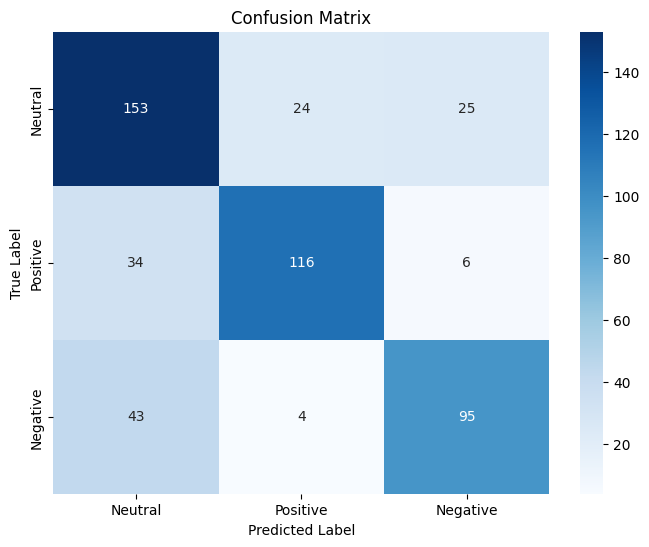

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Assuming y_valid_le is your one-hot encoded validation labels
# Convert y_valid_le to single labels if you haven't already
y_valid_single_label = np.argmax(y_valid_le, axis=1)

# Assuming y_valid_pred is the output of your Random Forest model.
# If y_valid_pred is in one-hot encoded format or probability distribution,
# convert it to single labels by taking the argmax.
# This is crucial to avoid the "multiclass and multilabel-indicator" mix error.
if y_valid_pred.ndim > 1:  # Check if it's not already single-label
    y_valid_pred_single_label = np.argmax(y_valid_pred, axis=1)
else:
    y_valid_pred_single_label = y_valid_pred # It's already single-label

# Now use the single-label predictions and true values for metrics
val_accuracy = accuracy_score(y_valid_single_label, y_valid_pred_single_label)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_valid_single_label, y_valid_pred_single_label))

# Create the confusion matrix using single labels
cm = confusion_matrix(y_valid_single_label, y_valid_pred_single_label)

# Define class labels for the plot
class_labels = ['Neutral', 'Positive', 'Negative']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()